Gender voice dataset
Source : https://www.mldata.io/dataset-details/gender_voice/
meanfreq	-	mean frequency (in kHz)

sd	-	standard deviation of frequency

median - median frequency (in kHz)

IQR	-	interquantile range (in kHz)

sp.ent	-	spectral entropy

centroid	-	frequency centroid (see specprop)

minfun	-	minimum fundamental frequency measured across acoustic signal

label	-	Predictor class, male or female

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier 
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


### Importing the Data

In [2]:
data = pd.read_csv('gender_voice_dataset.csv')
data.sample(10)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
2137,0.187764,0.031560,0.187600,0.174618,0.202873,0.028255,2.466215,8.844264,0.843168,0.225496,...,0.187764,0.168761,0.015936,0.250000,0.577846,0.007812,7.000000,6.992188,0.099441,female
2190,0.194338,0.045574,0.199560,0.168411,0.225575,0.057164,1.133760,3.210560,0.908139,0.372299,...,0.194338,0.143627,0.046967,0.279070,1.619141,0.023438,9.023438,9.000000,0.146205,female
216,0.177642,0.059646,0.174659,0.124990,0.228148,0.103158,1.184981,4.167449,0.939683,0.508660,...,0.177642,0.120185,0.018957,0.271186,0.663125,0.093750,3.656250,3.562500,0.165427,male
3055,0.197638,0.040748,0.199705,0.192935,0.216253,0.023318,4.720709,32.100238,0.827978,0.252507,...,0.197638,0.198488,0.153846,0.270270,0.461426,0.004883,0.800781,0.795898,0.415784,female
2852,0.233744,0.029424,0.237921,0.223764,0.247360,0.023596,2.893058,11.452071,0.796059,0.141941,...,0.233744,0.202037,0.053452,0.277457,1.815104,0.023438,11.250000,11.226562,0.141810,female
412,0.186824,0.057162,0.198362,0.139653,0.233449,0.093797,1.021940,3.753306,0.932726,0.465218,...,0.186824,0.105533,0.032520,0.238806,1.325639,0.117188,6.445312,6.328125,0.323104,male
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,...,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,female
1574,0.166418,0.062124,0.141639,0.118176,0.228934,0.110758,2.284220,10.580525,0.931208,0.478228,...,0.166418,0.114064,0.035971,0.188679,0.654297,0.083008,3.457031,3.374023,0.264139,male
906,0.201081,0.059303,0.220291,0.136607,0.257383,0.120775,2.016638,7.437046,0.890206,0.270385,...,0.201081,0.125249,0.047198,0.263736,0.463956,0.023438,2.671875,2.648438,0.070354,male
1350,0.206842,0.062513,0.229494,0.142658,0.268924,0.126266,2.999798,14.404063,0.859690,0.238468,...,0.206842,0.141785,0.047151,0.279070,1.209579,0.023438,7.101562,7.078125,0.143676,male


In [3]:
data.shape

(3168, 21)

## Checking for Nulls 

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

### Converting all attributes to keys 

In [5]:
data.keys()

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label'],
      dtype='object')

## Encoding the Label (M or F) in to a numerical values ( 0 and 1)

In [6]:
labelEncoder = LabelEncoder()

data.label = labelEncoder.fit_transform(data.label.astype(str))

data.head()


,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,1
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,1
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,1
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,1


In [7]:
labelEncoder.classes_

array(['female', 'male'], dtype=object)

Box plot for male and female group by mean frequency

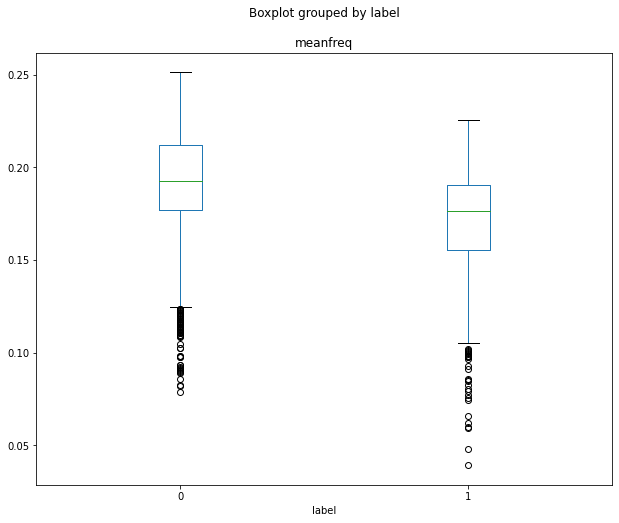

In [8]:
data.boxplot(by ='label', column =['meanfreq'], grid = False, figsize=(10, 8) )

### Logistic Regression Classifier


In [9]:
def logistic_model(x_train, y_train):
    print("Logistic Regression Model")
    logistic_classifier = LogisticRegression(penalty='l2', solver='liblinear')
    logistic_classifier.fit(x_train, y_train)
    return logistic_classifier 


### Naive Baye's Classifier


In [10]:
def naive_bayes_model(x_train, y_train):
    print("Naive Bayes model")
    naive_bayes_classifier = GaussianNB()
    naive_bayes_classifier.fit(x_train, y_train)
    return naive_bayes_classifier

### K-nearest-neighbors Classifier

In [11]:
def k_nearest_neighbors_model(x_train, y_train):
    print("K-Nearest neighbor model")
    k_nearest_neighbors_classifier = KNeighborsClassifier(n_neighbors=10)
    k_nearest_neighbors_classifier.fit(x_train, y_train)
    return k_nearest_neighbors_classifier


### Support Vector Classifier

In [12]:
def svc_model(x_train, y_train):
    print("SVC model")
    svc_classifier = SVC(kernel='rbf', gamma='scale')
    svc_classifier.fit(x_train, y_train)
    return svc_classifier

### MLP Neural Network Classifier

In [13]:
def mlp_model(x_train, y_train):
    print("MLP Neural Network")
    mlp_classifier = MLPClassifier(activation='relu', hidden_layer_sizes=(20,20,20) , solver='adam', verbose=True, max_iter=1000)
    mlp_classifier.fit(x_train, y_train)

    return mlp_classifier

### Decision Tree Classifier

In [14]:
def decision_tree_model(x_train, y_train):
    print("Decision tree model")
    decision_classifier = DecisionTreeClassifier(max_depth=6)
    decision_classifier.fit(x_train, y_train)
    return decision_classifier

### Train-Test Split and Standard Scaler

Defining the X and Y variables and splitting the data 80% training and 20% test, and standardizing the x-variables.

In [15]:
    X = data.drop('label', axis=1)
    Y = data['label']
    x_train, x_test, y_train, y_test = train_test_split(X, Y, shuffle = True, test_size=0.2, random_state=0)
    scaler = StandardScaler()
    scaler.fit(x_train)

    x_train = scaler.transform(x_train)

    x_test = scaler.transform(x_test)
    

In [ ]:
### Build, Train, test and evaluate model 
 For our evaluations We not only measured the accuracy but also displayed the confusion matrix which evaluates the performance of each classification. From the confusion matrix we can derive the Precision (ratio of True positive(TP)/(TP + FP(False Positive))) , Recall(ratio of TP/TP + FN (False Negative)) and f1 - scores(where weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. f1 = 2 * (precision * recall) / (precision + recall)).
    

In [16]:
def build_and_train_model(data, target_name, class_fn):

    model = class_fn(x_train, y_train)
    
    score = model.score(x_train, y_train)
    print("Training Score : ", score)

    y_pred = model.predict(x_test)

    accuracy = accuracy_score(y_test, y_pred)
    print("Testing Score: ", accuracy)

    Confusion_Matrix = confusion_matrix(y_test, y_pred)
    
    Classification_report = classification_report(y_test, y_pred)

    df_y = pd.DataFrame({'y_test' : y_test, 'y_pred' : y_pred})
    print(df_y.sample(10))


    return {'model' : model, 
            'x_train' : x_train, 'x_test' : x_test,
            'y_train' : y_train, 'y_test' : y_test, 
            'y_pred' : y_pred, 'sample' : df_y.sample(10), 'Confusion Matrix' : print(' \n Confusion_matrix : \n', Confusion_Matrix),
            'Classification Report' : print('\n Classification Report : \n', Classification_report)
           }






Utilizing the build and train model function to predict classification (male or female), score and generate classification report for eeach model on the data. 3 inputs as needed: data file, value to predict(label), and the type of model below. Results in order Training score, Testing/accuracy, precision, recall and f1- score to evaluate the classification accuracy and the Y_test: actual values and Y_pred = predicted values. 

In [17]:
Logistic_Regression_model = build_and_train_model(data, 'label', logistic_model)

Logistic Regression Model
Training Score :  0.9747434885556433
Testing Score:  0.973186119873817
      y_test  y_pred
2245       0       1
2128       0       0
861        1       1
1964       0       1
410        1       1
1505       1       1
2638       0       0
1254       1       1
1390       1       1
117        1       1
 
 Confusion_matrix : 
 [[289  12]
 [  5 328]]

 Classification Report : 
               precision    recall  f1-score   support

           0       0.98      0.96      0.97       301
           1       0.96      0.98      0.97       333

    accuracy                           0.97       634
   macro avg       0.97      0.97      0.97       634
weighted avg       0.97      0.97      0.97       634



In [18]:
naive_bayes_model = build_and_train_model(data, 'label', naive_bayes_model)

Naive Bayes model
Training Score :  0.8970007892659826
Testing Score:  0.8848580441640379
      y_test  y_pred
2731       0       0
2485       0       0
1330       1       1
446        1       1
1267       1       1
2031       0       0
668        1       1
776        1       1
1768       0       1
2215       0       0
 
 Confusion_matrix : 
 [[266  35]
 [ 38 295]]

 Classification Report : 
               precision    recall  f1-score   support

           0       0.88      0.88      0.88       301
           1       0.89      0.89      0.89       333

    accuracy                           0.88       634
   macro avg       0.88      0.88      0.88       634
weighted avg       0.88      0.88      0.88       634



In [19]:
k_nearest_neighbors_model = build_and_train_model(data, 'label', k_nearest_neighbors_model)

K-Nearest neighbor model
Training Score :  0.9779005524861878
Testing Score:  0.9747634069400631
      y_test  y_pred
1283       1       1
2095       0       0
712        1       1
1038       1       1
692        1       1
1861       0       0
1767       0       0
1015       1       1
1457       1       1
302        1       1
 
 Confusion_matrix : 
 [[292   9]
 [  7 326]]

 Classification Report : 
               precision    recall  f1-score   support

           0       0.98      0.97      0.97       301
           1       0.97      0.98      0.98       333

    accuracy                           0.97       634
   macro avg       0.97      0.97      0.97       634
weighted avg       0.97      0.97      0.97       634



In [20]:
support_vector_classifier_model = build_and_train_model(data, 'label', svc_model)

SVC model
Training Score :  0.9846093133385951
Testing Score:  0.9842271293375394
      y_test  y_pred
880        1       1
1850       0       0
242        1       1
1127       1       1
1861       0       0
3003       0       0
2587       0       0
2275       0       0
1927       0       0
2279       0       0
 
 Confusion_matrix : 
 [[297   4]
 [  6 327]]

 Classification Report : 
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       301
           1       0.99      0.98      0.98       333

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634



In [21]:
mlp_classifier_model = build_and_train_model(data, 'label', mlp_model)

MLP Neural Network
Iteration 1, loss = 0.61548635
Iteration 2, loss = 0.52786735
Iteration 3, loss = 0.44769139
Iteration 4, loss = 0.37120999
Iteration 5, loss = 0.30381663
Iteration 6, loss = 0.24680668
Iteration 7, loss = 0.19934544
Iteration 8, loss = 0.16226046
Iteration 9, loss = 0.13535941
Iteration 10, loss = 0.11815242
Iteration 11, loss = 0.10522658
Iteration 12, loss = 0.09609977
Iteration 13, loss = 0.08889537
Iteration 14, loss = 0.08336971
Iteration 15, loss = 0.07982205
Iteration 16, loss = 0.07562123
Iteration 17, loss = 0.07301848
Iteration 18, loss = 0.07062552
Iteration 19, loss = 0.06950372
Iteration 20, loss = 0.06687980
Iteration 21, loss = 0.06584020
Iteration 22, loss = 0.06462165
Iteration 23, loss = 0.06503456
Iteration 24, loss = 0.06244386
Iteration 25, loss = 0.06102884
Iteration 26, loss = 0.06030622
Iteration 27, loss = 0.05900395
Iteration 28, loss = 0.05856556
Iteration 29, loss = 0.05808110
Iteration 30, loss = 0.05630242
Iteration 31, loss = 0.0559866

In [22]:
decision_tree_classifier_model = build_and_train_model(data, 'label', decision_tree_model)

Decision tree model
Training Score :  0.9928966061562746
Testing Score:  0.9652996845425867
      y_test  y_pred
1985       0       0
961        1       1
1174       1       1
2062       0       0
2515       0       0
1059       1       1
148        1       1
1683       0       0
461        1       1
2013       0       0
 
 Confusion_matrix : 
 [[292   9]
 [ 13 320]]

 Classification Report : 
               precision    recall  f1-score   support

           0       0.96      0.97      0.96       301
           1       0.97      0.96      0.97       333

    accuracy                           0.97       634
   macro avg       0.97      0.97      0.97       634
weighted avg       0.97      0.97      0.97       634



### Split the training data further into 2 parts to test warm_start

In [23]:
x_train_1, x_train_2, y_train_1, y_train_2 = train_test_split(x_train, y_train, test_size=0.5)

### Random Forest Classifier

In [24]:
random_classifier_model = RandomForestClassifier(max_depth=4, n_estimators=2, warm_start=True)

In [25]:
random_classifier_model.fit(x_train_1, y_train_1)
y_pred = random_classifier_model.predict(x_test)
test_score = accuracy = accuracy_score(y_test, y_pred)
Confusion_Matrix = confusion_matrix(y_test, y_pred)
Classification_report = classification_report(y_test, y_pred)
print("Testing Score : ", test_score)
print('\n Confusion_matrix : \n', Confusion_Matrix)
print('\n Classification Report : \n', Classification_report)

Testing Score :  0.9274447949526814

 Confusion_matrix : 
 [[270  31]
 [ 15 318]]

 Classification Report : 
               precision    recall  f1-score   support

           0       0.95      0.90      0.92       301
           1       0.91      0.95      0.93       333

    accuracy                           0.93       634
   macro avg       0.93      0.93      0.93       634
weighted avg       0.93      0.93      0.93       634



In [26]:
random_classifier_model.n_estimators += 2
random_classifier_model.fit(x_train_2, y_train_2)
y_pred = random_classifier_model.predict(x_test)
test_score = accuracy = accuracy_score(y_test, y_pred)
print("Testing Score : ", test_score)
print('\n Confusion_matrix : \n', Confusion_Matrix)
print('\n Classification Report : \n', Classification_report)

Testing Score :  0.944794952681388

 Confusion_matrix : 
 [[270  31]
 [ 15 318]]

 Classification Report : 
               precision    recall  f1-score   support

           0       0.95      0.90      0.92       301
           1       0.91      0.95      0.93       333

    accuracy                           0.93       634
   macro avg       0.93      0.93      0.93       634
weighted avg       0.93      0.93      0.93       634

